In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
mds = pd.read_csv("Movie DataSet IMDB.csv",encoding='latin1')
mds.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [28]:
mds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [29]:
#now there a re so many null values all we will drop all the rows with null values
total = mds.isnull().sum().sort_values(ascending=False)
total
percent = (mds.isnull().sum()/mds.isnull().count()).sort_values(ascending=False)
percent
nullpercent = pd.concat([total,percent],axis = 1,keys = ['Total','Percent'])
nullpercent
mds = mds.dropna()

In [30]:
mds.shape

(5659, 10)

In [31]:
mds.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [32]:
mds ['Duration'] = mds['Duration'].str.replace('min','')
mds['Duration'] = mds['Duration'].astype(int)


In [33]:
mds.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [34]:
mds['Year'] = mds['Year'].astype(int)

In [35]:
mds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   int32  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(2), object(7)
memory usage: 442.1+ KB


In [36]:
mds['Votes'] = mds['Votes'].str.replace(',','')
mds['Votes'] = mds['Votes'].astype(int)

In [37]:
mds.info()
mds.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   int32  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 420.0+ KB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Text(0.5, 1.0, 'Rating Distribution')

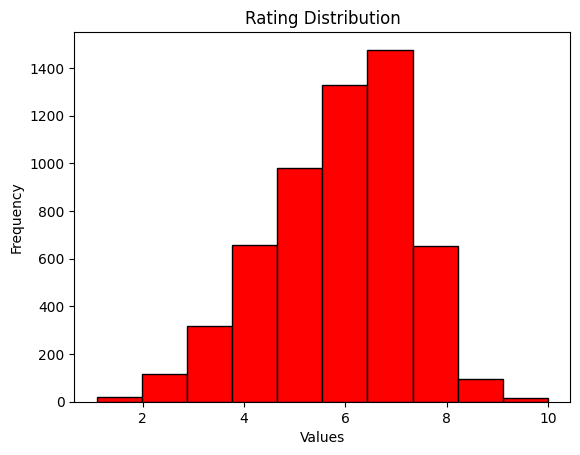

In [38]:
#as data cleaing is completed we will perform exploratory data analysis
#now we will find ratings distribution4
plt.hist(mds['Rating'],bins=10,color='red',edgecolor = 'black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Rating Distribution')

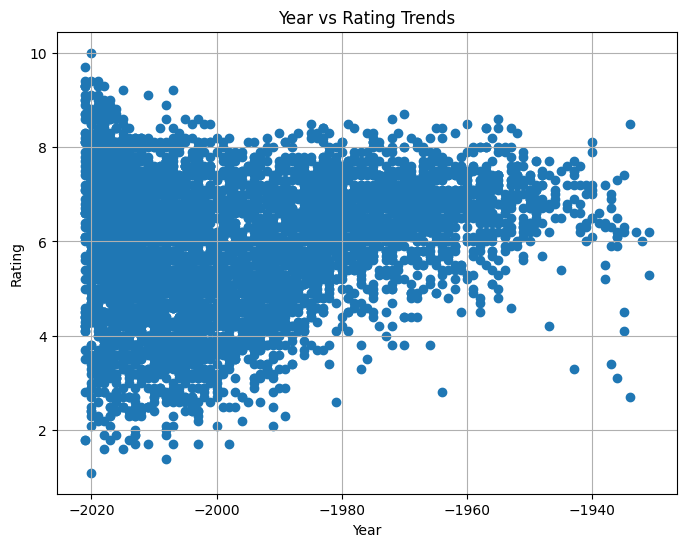

In [39]:
#we will draw a scatter plot to see how ratings evolved each time
plt.figure(figsize=(8,6))
plt.scatter(mds['Year'],mds['Rating'])
plt.title('Year vs Rating Trends')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Movies per year')

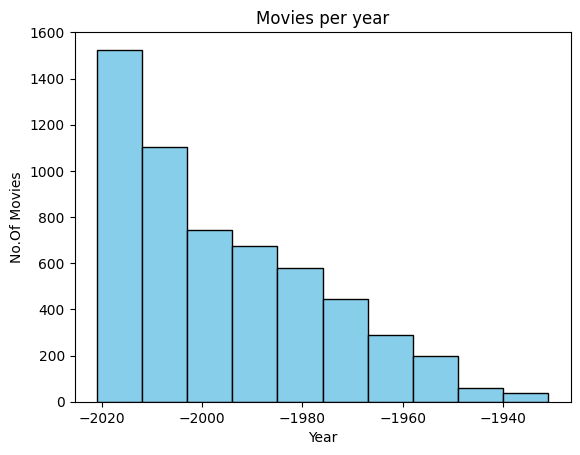

In [40]:
#now we will find how many movies released per year
plt.hist(mds['Year'],bins=10,color='skyblue',edgecolor = 'black')
plt.xlabel('Year')
plt.ylabel('No.Of Movies')
plt.title('Movies per year')

In [41]:
mds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   int32  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 420.0+ KB


In [42]:
mds.drop(['Name','Genre','Director'],axis=1,inplace=True)
mds

,Year,Duration,Rating,Votes,Actor 1,Actor 2,Actor 3
1,-2019,109,7.0,8,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,-2019,110,4.4,35,Prateik,Ishita Raj,Siddhant Kapoor
5,-1997,147,4.7,827,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,-2005,142,7.4,1086,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,-2012,82,5.6,326,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...
15493,-2015,115,6.1,408,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,-2001,153,6.2,1496,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,-1989,125,5.8,44,Chiranjeevi,Jayamalini,Rajinikanth
15505,-1999,129,4.5,655,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [43]:
#now we will encode the values for the data set actors
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
mds['Actor 1'] = encoder.fit_transform(mds['Actor 1'])
mds['Actor 2'] = encoder.fit_transform(mds['Actor 2'])
mds['Actor 3'] = encoder.fit_transform(mds['Actor 3'])

In [44]:
mds

,Year,Duration,Rating,Votes,Actor 1,Actor 2,Actor 3
1,-2019,109,7.0,8,1352,2272,319
3,-2019,110,4.4,35,1198,719,2148
5,-1997,147,4.7,827,378,75,2045
6,-2005,142,7.4,1086,692,1112,2524
8,-2012,82,5.6,326,1934,1175,1013
...,...,...,...,...,...,...,...
15493,-2015,115,6.1,408,1861,1801,1615
15494,-2001,153,6.2,1496,763,1619,1184
15503,-1989,125,5.8,44,406,754,1685
15505,-1999,129,4.5,655,112,2164,314


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(mds.drop('Rating',axis=1),mds['Rating'],test_size=0.3,random_state=10)

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [48]:
predict = model.predict(x_test)

In [49]:
predict

array([5.70483001, 5.8617947 , 5.53455089, ..., 5.61293081, 5.68045623,
       6.11459569])

In [52]:
print('Train Score :',model.score(x_train,y_train))
print('Test Score :',model.score(x_train,y_train))

Train Score : 0.08303253793289334
Test Score : 0.08303253793289334
